# Use Kurukz

In [1]:
from dustapprox.io import svo
import numpy as np
import pickle
from scipy.interpolate import CubicSpline
from scipy.interpolate import RegularGridInterpolator
import extinction as ext
from astropy.constants import R_sun,pc
import matplotlib.pyplot as plt

In [2]:
which_filters = ['GAIA/GAIA3.G','GAIA/GAIA3.Gbp', 'GAIA/GAIA3.Grp','2MASS/2MASS.J', '2MASS/2MASS.H', '2MASS/2MASS.Ks','WISE/WISE.W1','WISE/WISE.W2']
passbands = svo.get_svo_passbands(which_filters)
pb_interp=[]

for pb in passbands:
    pb_interp.append(CubicSpline(np.array(pb.wavelength)*10,pb.transmit,extrapolate=False))

passband_zeropoint_vega=np.array([pk.Vega_zero_flux.value for pk in passbands])


In [3]:
from glob import glob

loc='/Users/mattocallaghan/VaeStar/Isochrones_data/Kurucz2003all/*.fl.dat.txt'
models = glob(loc)

In [12]:
import astropy.units as u

In [29]:
passbands[0].get_flux(np.linspace(0,10000,10000)*u.nm,1*np.linspace(0,10000,10000)*u.erg)

UnitConversionError: 'erg' (energy/torque/work) and 'flam' (power density/spectral flux density wav) are not convertible

In [26]:
passbands[0].apply_transmission(np.linspace(0,10000,1000000)*u.nm,1).sum()

31732.36174144315

In [ ]:
import astropy.units as u

(0.0, 10000.0)

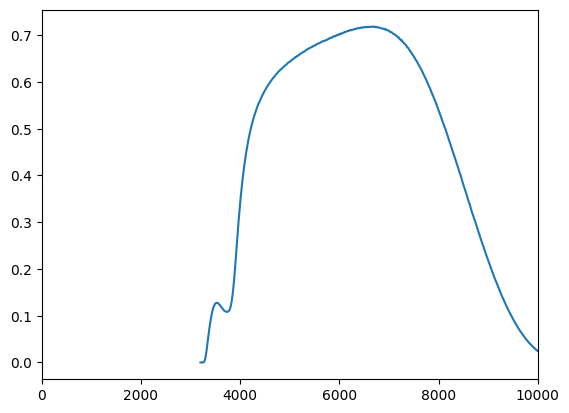

In [57]:
#plt.plot(wl[700],fluxes[700]*u.)
plt.plot(passbands[0].wavelength*10,passbands[0].transmit)
plt.xlim(0,10000)

In [48]:
passbands[0].wavelength_unit

'nm'

In [50]:
np.array([passband.Vega_zero_flux.value for passband in passbands])

array([2.50649433e-09, 4.06966690e-09, 1.27871752e-09, 3.14212353e-10,
       1.14415173e-10, 4.30549622e-11, 8.23825931e-12, 2.43140823e-12])

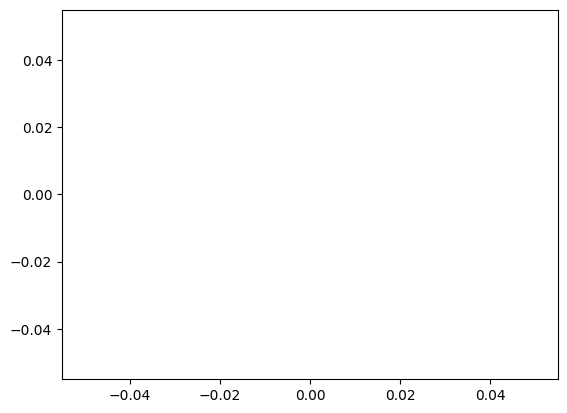

In [74]:
plt.plot(passbands[0].wavelength,pb_interp[0](passbands[0].wavelength))
plt.plot(passbands[0].wavelength,passbands[0].transmit-pb_interp[0](passbands[0].wavelength))

In [ ]:
passbands[0].get_flux()

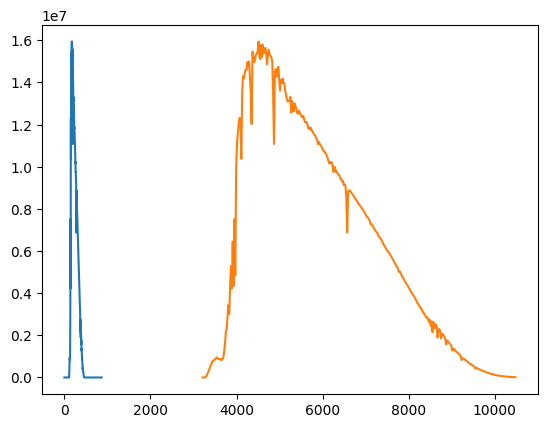

In [66]:
plt.plot(passbands[0].apply_transmission(wl[30]*lamb_unit,fluxes[30]))
plt.plot(wl[30]*lamb_unit,fluxes[30]*pb_interp[0](wl[30]*lamb_unit))

In [40]:
from glob import glob

loc='/Users/mattocallaghan/VaeStar/Isochrones_data/Kurucz2003all/*.fl.dat.txt'
models = glob(loc)
apfields = ['teff', 'logg', 'feh', 'alpha']
wl=[]
fehs=[]
logg=[]
teff=[]
fluxes=[]

label = 'teff={teff:4g} K, logg={logg:0.1g} dex, [Fe/H]={feh:0.1g} dex'
for fname in models[0:1]:
    data = svo.spectra_file_reader(fname)
    lamb_unit, flux_unit = svo.get_svo_sprectum_units(data)

    lamb = data['data']['WAVELENGTH'].values * lamb_unit
    truth=(data['data']['WAVELENGTH']<60000)*(data['data']['WAVELENGTH']>2000)
    data['data'][truth]
    if(data['alpha']['value']==0.0):
        wl.append(data['data'][truth]['WAVELENGTH'].values)#.reshape(-1, 2).mean(-1))
        fluxes.append(data['data'][truth]['FLUX'].values)#.reshape(-1, 2).mean(-1))
        fehs.append(data['feh']['value'])
        logg.append(data['logg']['value'])
        teff.append(data['teff']['value'])
        #flux=flux*curves[1](data['data']['WAVELENGTH'].values * lamb_unit,av,Rv=Rv)

In [42]:
flux_unit

Unit("erg / (Angstrom cm2 s)")

In [30]:

  
pars=np.stack([np.array(fehs),np.array(logg),np.array(teff)]).T
feh_unique=np.unique(np.array(fehs))
logg_unique=np.unique(np.array(logg))
teff_unique=np.unique(np.array(teff))
parameters=np.stack(np.meshgrid(feh_unique,logg_unique,teff_unique,indexing='ij'),axis=-1)
flux_grid=(np.zeros((parameters.shape[:-1]+(len(wl[0]),)))*np.NaN)
indices=[]
for i,j,k in np.ndindex((parameters.shape[0:-1])):
    try:
        idx=np.where([(np.prod(pars[_]==parameters[i,j,k])) for _ in range(len(pars))])[0]
        
        flux_grid[i,j,k]=fluxes[int(idx)]
        indices.append(np.array([i,j,k]))
    except:
        continue

interp=RegularGridInterpolator((feh_unique,logg_unique,teff_unique),flux_grid,method='linear',
                                bounds_error=False, fill_value=np.NaN)   

IndexError: list index out of range

In [39]:
flux_unit

Unit("erg / (Angstrom cm2 s)")

In [36]:
flux_unit.find_equivalent_units()

Primary name,Unit definition,Aliases
ST,0.0363078 kg / (m s3),STflux
flam,1e+07 kg / (m s3),


In [39]:
pars=np.stack([np.array(fehs),np.array(logg),np.array(teff)]).T
feh_unique=np.unique(np.array(fehs))
logg_unique=np.unique(np.array(logg))
teff_unique=np.unique(np.array(teff))
parameters=np.stack(np.meshgrid(feh_unique,logg_unique,teff_unique,indexing='ij'),axis=-1)
flux_grid=(np.zeros((parameters.shape[:-1]+(len(wl[0]),)))*np.NaN)

In [77]:
import astropy.units as u

In [80]:
lamb_unit.to(u.nm)*wl[0]

array([ 200.5,  201.5,  202.5,  203.5,  204.5,  205.5,  206.5,  207.4,
        207.8,  208.5,  209.5,  210.5,  211.5,  212.5,  213.5,  214.5,
        215.5,  216.5,  217.5,  218.5,  219.5,  220.5,  221.5,  222.5,
        223.5,  224.5,  225.5,  226.5,  227.5,  228.5,  229.5,  230.5,
        231.5,  232.5,  233.5,  234.5,  235.5,  236.5,  237.5,  238.5,
        239.5,  240.5,  241.5,  242.5,  243.5,  244.5,  245.5,  246.5,
        247.5,  248.5,  249.5,  250.5,  251.3,  251.8,  252.5,  253.5,
        254.5,  255.5,  256.5,  257.5,  258.5,  259.5,  260.5,  261.5,
        262.5,  263.5,  264.5,  265.5,  266.5,  267.5,  268.5,  269.5,
        270.5,  271.5,  272.5,  273.5,  274.5,  275.5,  276.5,  277.5,
        278.5,  279.5,  280.5,  281.5,  282.5,  283.5,  284.5,  285.5,
        286.5,  287.5,  288.5,  289.5,  291. ,  293. ,  295. ,  297. ,
        299. ,  301. ,  303. ,  305. ,  307. ,  309. ,  311. ,  313. ,
        315. ,  317. ,  319. ,  321. ,  323. ,  325. ,  327. ,  329. ,
      

In [40]:
indices=[]
for i,j,k in np.ndindex((parameters.shape[0:-1])):
    try:
        idx=np.where([(np.prod(pars[_]==parameters[i,j,k])) for _ in range(len(pars))])[0]
        
        flux_grid[i,j,k]=fluxes[int(idx)]
        indices.append(np.array([i,j,k]))
    except:
        continue

interp=RegularGridInterpolator((feh_unique,logg_unique,teff_unique),flux_grid,method='linear',
                                bounds_error=False, fill_value=np.NaN)   

# Test fits pheonix


In [117]:
import astropy.io
examp=fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm00_2000.fits')

In [115]:
examp[0].header['TEFF']

'2000'

In [194]:
import fitsio as fits

In [73]:
import pandas as pd

In [172]:
par=fits.read('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm00_2000.fits',columns=['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55'])
temp_file=astropy.io.fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm00_2000.fits')
par=pd.DataFrame(np.stack(np.array(par,dtype=object)).astype(float),columns=[['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55']][::-1])
par['TEFF']=temp_file[0].header['TEFF']
par['MH']=temp_file[0].header['METAL10']
par['WL_UNIT']=temp_file[1].header['TUNIT1']
par['FLUX_UNIT']=temp_file[1].header['TUNIT2']

In [173]:
par1=fits.read('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm05_5000.fits',columns=['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55'])
temp_file1=astropy.io.fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm05_5000.fits')
par1=pd.DataFrame(np.stack(np.array(par1,dtype=object)).astype(float),columns=[['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55']][::-1])
par1['TEFF']=temp_file1[0].header['TEFF']
par1['WL_UNIT']=temp_file1[1].header['TUNIT1']
par1['FLUX_UNIT']=temp_file1[1].header['TUNIT2']

try:
    par1['MH']=temp_file1[0].header['METAL10']
except:
    par1['MH']=temp_file1[0].header['LOG_Z']

In [176]:
x=astropy.io.fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/catalog.fits')

In [182]:
x[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   80 / length of dimension 1                          
NAXIS2  =                18636 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'INDEX   '                                                            
TFORM1  = '20A     '                                                            
TTYPE2  = 'FILENAME'                                                            
TFORM2  = '60A     '                                                            

(0.0, 50000.0)

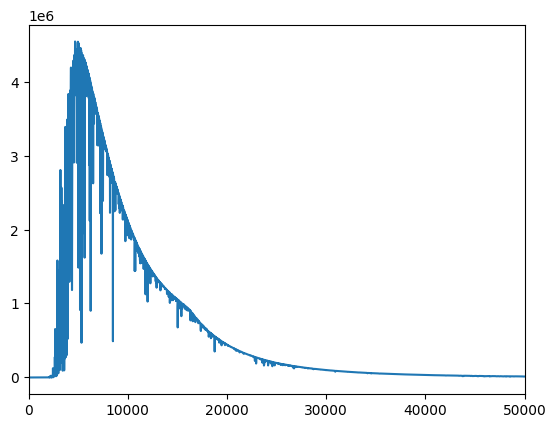

In [169]:
#plt.plot(par['WAVELENGTH'],par['g40']/par['g40'].max())
plt.plot(par1['WAVELENGTH'],par1['g40'])
plt.xlim(0,50000)

In [200]:
import glob

folder_path = '/Users/mattocallaghan/SEDNest/Data/Phoenix/'
file_pattern = '*.fits'

# Get a list of all FITS files in the folder
fits_files = glob.glob(folder_path + file_pattern)
def fitsread(fits_file,columns):
    try: 
        par=fits.read(fits_file,columns=columns)
        return par, columns
    except:
        columns=columns[:-1]
        return fitsread(fits_file,columns)

dfs=[]
# Open each FITS file
for fits_file in fits_files:
    columns=['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55','60']

    par1,columns=fitsread(fits_file,columns=columns)
    
    temp_file1=astropy.io.fits.open(fits_file)
    par1=pd.DataFrame(np.stack(np.array(par1,dtype=object)).astype(float),columns=[columns][::-1])
    par1['TEFF']=temp_file1[0].header['TEFF']
    par1['WL_UNIT']=temp_file1[1].header['TUNIT1']
    par1['FLUX_UNIT']=temp_file1[1].header['TUNIT2']

    try:
        par1['MH']=temp_file1[0].header['METAL10']
    except:
        par1['MH']=temp_file1[0].header['LOG_Z']
    dfs.append(par1)
    

In [203]:
pd.concat(dfs)

,WAVELENGTH,g00,g05,g10,g15,g20,g25,g30,g35,g40,g45,TEFF,WL_UNIT,FLUX_UNIT,MH,g50,g55
0,1.258925e+01,1.514537e-105,9.541134e-105,5.192064e-104,1.986095e-103,1.012232e-102,4.828142e-102,1.593602e-101,6.013399e-101,9.162205e-100,7.345139e-100,11600,ANGSTROM,FLAM,-0.0,NaN,NaN
1,1.260217e+01,1.514537e-105,9.541134e-105,5.192064e-104,1.986095e-103,1.012232e-102,4.828142e-102,1.593602e-101,6.013399e-101,9.162205e-100,7.345139e-100,11600,ANGSTROM,FLAM,-0.0,NaN,NaN
2,1.261509e+01,1.514537e-105,9.541134e-105,5.192064e-104,1.986095e-103,1.012232e-102,4.828142e-102,1.593602e-101,6.013399e-101,9.162205e-100,7.345139e-100,11600,ANGSTROM,FLAM,-0.0,NaN,NaN
3,1.262803e+01,1.514537e-105,9.541134e-105,5.192064e-104,1.986095e-103,1.012232e-102,4.828142e-102,1.593602e-101,6.013399e-101,9.162205e-100,7.345139e-100,11600,ANGSTROM,FLAM,-0.0,NaN,NaN
4,1.264098e+01,1.514537e-105,9.541134e-105,5.192064e-104,1.986095e-103,1.012232e-102,4.828142e-102,1.593602e-101,6.013399e-101,9.162205e-100,7.345139e-100,11600,ANGSTROM,FLAM,-0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9.844658e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.396051e-05,7.106996e-05,6.859014e-05,44000,ANGSTROM,FLAM,-1.5,0.0,0.0
4996,9.871894e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.314294e-05,7.029432e-05,6.784145e-05,44000,ANGSTROM,FLAM,-1.5,0.0,0.0
4997,9.899205e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.233411e-05,6.950938e-05,6.708797e-05,44000,ANGSTROM,FLAM,-1.5,0.0,0.0
4998,9.926592e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.153399e-05,6.874609e-05,6.634710e-05,44000,ANGSTROM,FLAM,-1.5,0.0,0.0


In [139]:
temp_file=astropy.io.fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm00_2000.fits')

temp_file1=astropy.io.fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm05_5000.fits')


In [140]:
temp_file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
FILENAME= 'phoenixm00_2000.fits' / Name of file                                 
MAPKEY  = 'phoenixBTS11_15'    / Mapping identifier for filetype                
CONTACT = 'M. McMaster/M. McDonald' / ReDCaT Team Lead/Deputy                   
CREATED = '2021-5-10'          / Date of file creation                          
DESCRIP = 'Phoenix Models BT-settl Allard et al. 03, 07, 09'                    
FILE_TYP= 'Atmosphere Grid Model' / Type of file                                
SYSTEMS = 'ETC, CDBS, PYSYNPHOT' / Systems that will use this filetype          
REASON  = 'Delivered to support Synphot, HST, and JWST'                         
TEFF    = '2000    '        

In [128]:
check=par['WAVELENGTH'].copy()

In [135]:
par['WAVELENGTH']

,WAVELENGTH
0,12.589254
1,12.602167
2,12.615093
3,12.628032
4,12.640984
...,...
102995,776038.518075
102996,776090.662457
102997,776142.810344
102998,776194.961734


In [134]:
check

,WAVELENGTH
0,1.000000e+01
1,1.006231e+01
2,1.012501e+01
3,1.018810e+01
4,1.025158e+01
...,...
4995,9.813543e+06
4996,9.848484e+06
4997,9.883549e+06
4998,9.918739e+06


In [131]:
check.values==par['WAVELENGTH'].values

/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_22329/380984692.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  check.values==par['WAVELENGTH'].values


False

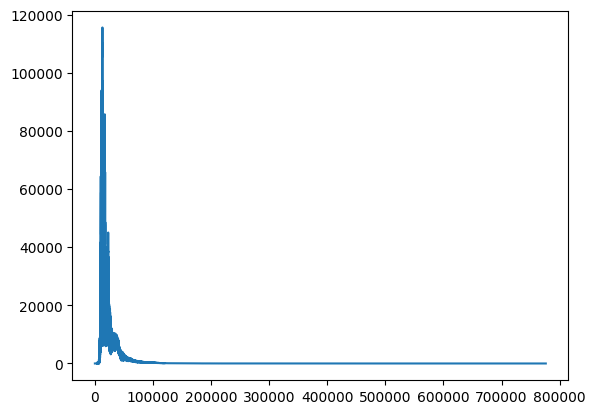

In [108]:
plt.plot(par['WAVELENGTH'],par['g00'])